In [16]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
labels = ['Strawberry Leaf Scorch',
          'Tomato Leaf Mold',
          'Tomato Mosaic Virus',
          'Corn Common Rust',
          'Potato Early Blight',
          'Corn Gray Leaf Spot'
          ]

In [26]:
class TensorflowLiteClassificationModel:
    def __init__(self, model_path, labels, image_size=224):
        self.interpreter = tf.lite.Interpreter(model_path=model_path)
        self.interpreter.allocate_tensors()
        self._input_details = self.interpreter.get_input_details()
        self._output_details = self.interpreter.get_output_details()
        self.labels = labels
        self.image_size=image_size

    def run_from_filepath(self, image_path):
        input_data_type = self._input_details[0]["dtype"]
        image = np.array(Image.open(image_path).resize((self.image_size, self.image_size)), dtype=input_data_type)
        image = np.expand_dims(image,axis=0)
        if input_data_type == np.float32:
            image = image / 255.

        if image.shape == (1, 224, 224):
            image = np.stack(image*3, axis=0)

        return self.run(image)

    def run(self, image):
        """
        args:
          image: a (1, image_size, image_size, 3) np.array

        Returns list of [Label, Probability], of type List<str, float>
        """

        self.interpreter.set_tensor(self._input_details[0]["index"], image)
        self.interpreter.invoke()
        tflite_interpreter_output = self.interpreter.get_tensor(self._output_details[0]["index"])
        probabilities = np.array(tflite_interpreter_output[0])

        # create list of ["label", probability], ordered descending probability
        label_to_probabilities = []
        for i, probability in enumerate(probabilities):
            label_to_probabilities.append([self.labels[i], float(probability)])
        return sorted(label_to_probabilities, key=lambda element: element[1])


### Testing

In [27]:
model = TensorflowLiteClassificationModel("./model.tflite",labels=labels)

In [31]:
res = model.run_from_filepath("test_imgs/PotatoEarlyBlight1.JPG")

In [32]:
res

[['Tomato Mosaic Virus', 5.0],
 ['Tomato Leaf Mold', 7.0],
 ['Corn Common Rust', 9.0],
 ['Corn Gray Leaf Spot', 9.0],
 ['Strawberry Leaf Scorch', 10.0],
 ['Potato Early Blight', 215.0]]

### MISC

In [3]:
intp = tf.lite.Interpreter(model_path='./model.tflite')
intp.allocate_tensors()
int_details = intp.get_input_details()
out_details = intp.get_output_details()

In [4]:
int_details

[{'name': 'image',
  'index': 0,
  'shape': array([  1, 224, 224,   3], dtype=int32),
  'shape_signature': array([  1, 224, 224,   3], dtype=int32),
  'dtype': numpy.uint8,
  'quantization': (0.007874015718698502, 128),
  'quantization_parameters': {'scales': array([0.00787402], dtype=float32),
   'zero_points': array([128], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [5]:
out_details

[{'name': 'scores',
  'index': 172,
  'shape': array([1, 6], dtype=int32),
  'shape_signature': array([1, 6], dtype=int32),
  'dtype': numpy.uint8,
  'quantization': (0.00390625, 0),
  'quantization_parameters': {'scales': array([0.00390625], dtype=float32),
   'zero_points': array([0], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [15]:
image = np.array(Image.open('./test_imgs/AppleCedarRust2.JPG').resize((224, 224)), dtype=np.uint8)

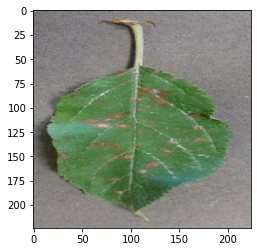

In [21]:
plt.imshow(image)

In [22]:
img_np = np.array(image)

In [24]:
img_np =  np.expand_dims(img_np,axis=0)

In [25]:
img_np.shape

(1, 224, 224, 3)